In [ ]:
### Simple Exploratory data analysis (EDA)
# data file: preprocessed_data.pkl
# total tweets distribution
# follower distribution
# following distribution
# user created time distribution
# location distribution
# language distribution
# retweets count distribution
# political stance distribution
# hashtags distribution

In [33]:
import pandas as pd
import numpy as np
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data visualization
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

In [44]:
data = pd.read_pickle("preprocessed_data.pkl")

In [57]:
no_tag = data[data['tags_splitted']=="NA"]

proRussia = data[data['pro_Russian']==True]
proRussiaNoUkraine = data[(data['pro_Russian']==True) & (data['pro_Ukraine']==False)]

proUkraine = data[data['pro_Ukraine']==True]
proUkraineNoRussia = data[(data['pro_Russian']==False) & (data['pro_Ukraine']==True)]

non_R = data[data['pro_Russian']==False]

non = data[(data['pro_Russian']==False) & (data['pro_Ukraine']==False)]
both = data[(data['pro_Russian']==True) & (data['pro_Ukraine']==True)]

display(proRussia.shape)
display(proUkraine.shape)
display(non.shape)
display(both.shape)
display(proRussiaNoUkraine.shape)
display(proUkraineNoRussia.shape)
display(non_R.shape)

(2882, 20)

(29552, 20)

(130200, 20)

(1006, 20)

(1876, 20)

(28546, 20)

(158746, 20)

In [52]:
node_columns = ["userid","username","usercreatedts","following","followers","totaltweets","pro_Russian","pro_Ukraine"]
nodesBefore = data[node_columns][(data['tweetcreatedts'] < '2022-03-04 23:59:59+00:00')]
nodesAfter = data[node_columns][(data['tweetcreatedts'] > '2022-03-04 23:59:59+00:00')]

difAll = round(len(nodesAfter) * 100 / len(nodesBefore), 2)
print("Tweets before Russia's block:", len(nodesBefore), "and after:", len(nodesAfter), "\nDifference:", difAll,"%", len(nodesAfter)-len(nodesBefore))

proRussianBefore = proRussia[node_columns][(proRussia['tweetcreatedts'] < '2022-03-04 23:59:59+00:00')]
proRussianAfter = proRussia[node_columns][(proRussia['tweetcreatedts'] > '2022-03-04 23:59:59+00:00')]
difRus = round(len(proRussianAfter) * 100 / len(proRussianBefore),2)
print("Pro-Russian tweets before Russia's block:", len(proRussianBefore), "and after:", len(proRussianAfter), "\nDifference:", difRus,"%", len(proRussianAfter)-len(proRussianBefore))

ratioBefore = round(len(proRussianBefore)/len(nodesBefore), 4)
ratioAfter = round(len(proRussianAfter)/len(nodesAfter), 4)

print("Ratio pro-Russian:Total tweets before block:", ratioBefore, "and after:", ratioAfter)


proUkraineBefore = proUkraine[node_columns][(proUkraine['tweetcreatedts'] < '2022-03-04 23:59:59+00:00')]
proUkraineAfter = proUkraine[node_columns][(proUkraine['tweetcreatedts'] > '2022-03-04 23:59:59+00:00')]
difUkr = round(len(proUkraineAfter) * 100 / len(proUkraineBefore),2)
print("Pro-Ukrainian tweets before Russia's block:", len(proUkraineBefore), "and after:", len(proUkraineAfter), "\nDifference:", difUkr,"%", len(proUkraineAfter)-len(proUkraineBefore))


bothBefore = both[node_columns][(both['tweetcreatedts'] < '2022-03-04 23:59:59+00:00')]
bothAfter = both[node_columns][(both['tweetcreatedts'] > '2022-03-04 23:59:59+00:00')]
difBoth = round(len(bothAfter) * 100 / len(bothBefore),2)
print("Both tweets before Russia's block:", len(bothBefore), "and after:", len(bothAfter), "\nDifference:", difBoth,"%", len(bothAfter)-len(bothBefore))


nonBefore = non[node_columns][(non['tweetcreatedts'] < '2022-03-04 23:59:59+00:00')]
nonAfter = non[node_columns][(non['tweetcreatedts'] > '2022-03-04 23:59:59+00:00')]
difNon = round(len(nonAfter) * 100 / len(nonBefore),2)
print("Neutral tweets before Russia's block:", len(nonBefore), "and after:", len(nonAfter), "\nDifference:", difNon,"%", len(nonAfter)-len(nonBefore))

Tweets before Russia's block: 73333 and after: 88295 
Difference: 120.4 % 14962
Pro-Russian tweets before Russia's block: 2029 and after: 853 
Difference: 42.04 % -1176
Ratio pro-Russian:Total tweets before block: 0.0277 and after: 0.0097
Pro-Ukrainian tweets before Russia's block: 11855 and after: 17697 
Difference: 149.28 % 5842
Both tweets before Russia's block: 623 and after: 383 
Difference: 61.48 % -240
Neutral tweets before Russia's block: 60072 and after: 70128 
Difference: 116.74 % 10056


1
9769.5
50107.60667087386
count    1.616280e+05
mean     5.010761e+04
std      1.280532e+05
min      0.000000e+00
25%      1.523000e+03
50%      9.769500e+03
75%      4.405700e+04
max      6.967834e+06
Name: totaltweets, dtype: float64
6967834 0


C:\Users\Namu\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


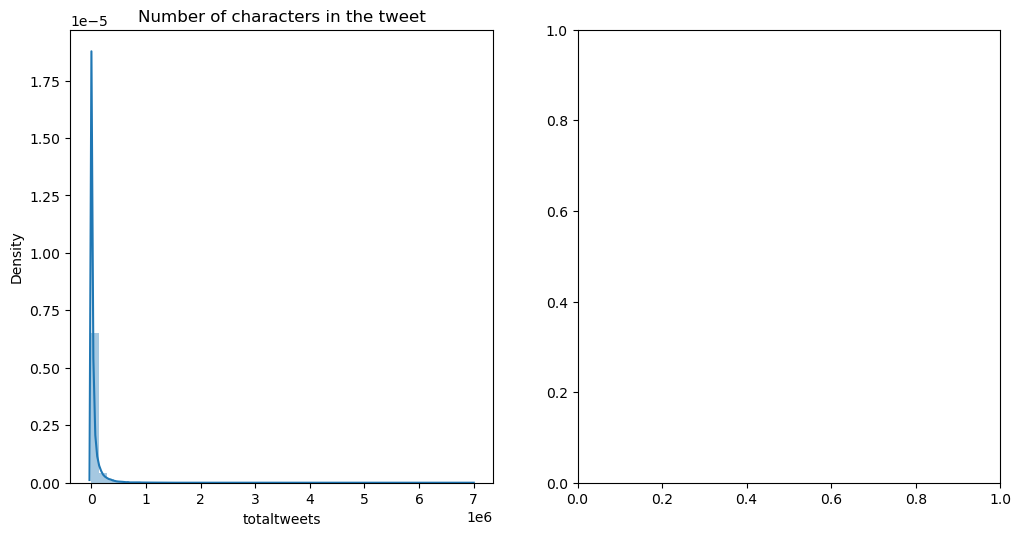

In [32]:
# total tweets distribution

plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Plot Histogram on x
x = data["totaltweets"]
print(st.mode(x))
print(st.median(x))
print(st.mean(x))
print(x.describe())
max_value = x.max()
min_value = x.min()
print(max_value, min_value)


fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.distplot(x, ax=ax1)
ax1.set_title('Number of characters in the tweet')
plt.show()

# plt.hist(data, bins=np.arange(data.min(), data.max()+1))
# plt.hist(x, bins=200) #doesn't show clearly, need to change
# plt.gca().set(title='Frequency Histogram', ylabel='Frequency')

count    1.616280e+05
mean     1.332195e+04
std      2.939765e+05
min      0.000000e+00
25%      5.100000e+01
50%      2.820000e+02
75%      1.237000e+03
max      1.755703e+07
Name: followers, dtype: float64
0
282.0
13321.949606503824
17557028 0


[Text(0.5, 1.0, 'Frequency Histogram'), Text(0, 0.5, 'Frequency')]

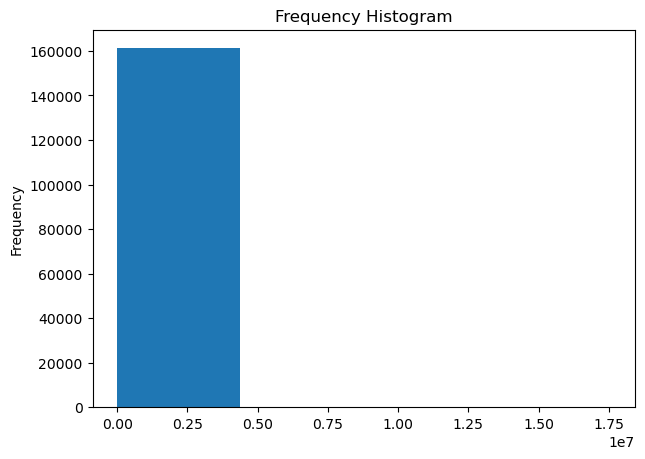

In [22]:
# follower distribution

plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Plot Histogram on x
x = data["followers"]
print(x.describe())

print(st.mode(x))
print(st.median(x))
print(st.mean(x))

max_value = x.max()
min_value = x.min()
print(max_value, min_value)


# plt.hist(data, bins=np.arange(data.min(), data.max()+1))
plt.hist(x, bins=10)  #doesn't show clearly, need to change
plt.gca().set(title='Frequency Histogram', ylabel='Frequency')

count    161628.000000
mean       1800.759701
std        9170.907634
min           0.000000
25%           1.000000
50%          25.000000
75%         301.000000
max      147637.000000
Name: retweetcount, dtype: float64
0
25.0
1800.7597012893805
147637 0


[Text(0.5, 1.0, 'Frequency Histogram'), Text(0, 0.5, 'Frequency')]

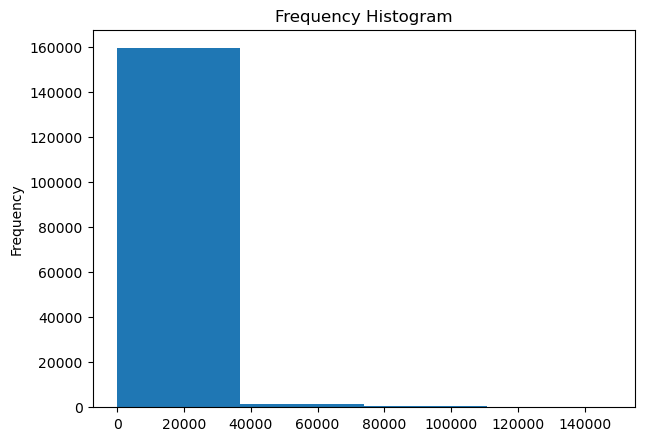

In [24]:
# retweetcount distribution

plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Plot Histogram on x
x = data["retweetcount"]
print(x.describe())

print(st.mode(x))
print(st.median(x))
print(st.mean(x))

max_value = x.max()
min_value = x.min()
print(max_value, min_value)


# plt.hist(data, bins=np.arange(data.min(), data.max()+1))
# plt.hist(x, bins=10) 
# plt.gca().set(title='Frequency Histogram', ylabel='Frequency')

In [39]:
data["text"][data["retweetcount"] == 147637].to_list()

[".@ZelenskyyUa's tv address to the Russian (!) people might be the most moving speech that I've ever seen in my entire life. The whole world needs to see, understand and share this crucial Ukrainian message.\n#StandWithUkraine #Ukraine #Україна #Russia #Россия https://t.co/WoMOgqXTWX"]

In [23]:
data.columns

Index(['userid', 'username', 'textid', 'location', 'language', 'tweetid',
       'tweetcreatedts', 'retweetcount', 'hashtags', 'text', 'usercreatedts',
       'following', 'followers', 'totaltweets', 'tags_splitted', 'tags_lower',
       'pro_Russian', 'pro_Ukraine'],
      dtype='object')

In [34]:
# FUNCTION FOR PRINTING MOST COMMON WORDS BY CATEGORY

def count_words_frequency(df):

    # print("Word cloud of most frequent words for the sentiment : {}".format(sentiment))

    temp_df = df
    print("Number of Rows : ", len(temp_df))

    corpus = ''
    for text in temp_df.text:
        text = str(text)
        corpus += text
        
    total = 0
    count = defaultdict(lambda: 0)
    for word in corpus.split(" "):
        total += 1
        count[word] += 1
        
    top20pairs = sorted(count.items(), key=lambda kv: kv[1], reverse=True)[:20]
    top20words = [i[0] for i in top20pairs]
    top20freq = [i[1] for i in top20pairs]
    
    xs = np.arange(len(top20words))
    width = 0.5

    fig = plt.figure(figsize=(10,6))                                                               
    ax = fig.gca()  #get current axes
    ax.bar(xs, top20freq, width, align='center')

    ax.set_xticks(xs)
    ax.set_xticklabels(top20words)
    plt.xticks(rotation=45)
    
    
    stopwords = set(STOPWORDS)
    # lower max_font_size, change the maximum number of word and lighten the background:
    wordcloud = WordCloud(max_font_size=50, max_words=50,stopwords=stopwords, background_color="white").generate(corpus)
    plt.figure(figsize = (12, 12), facecolor = None)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [35]:
from collections import defaultdict
print_word_cloud(data)

NameError: name 'print_word_cloud' is not defined

C:\Users\Namu\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Namu\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


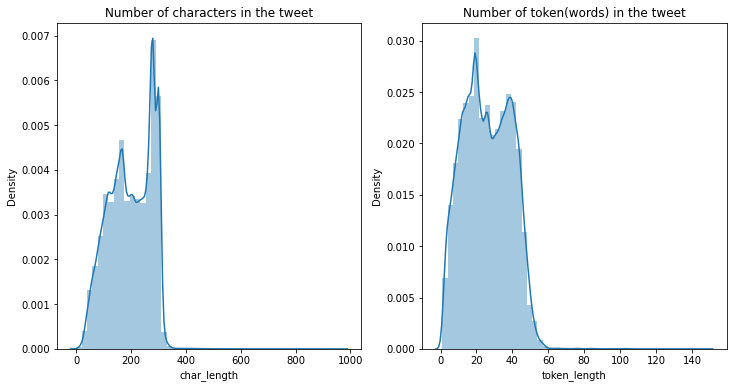

In [36]:
# Distribution of character length and token length overall
df = data["text"]
df['char_length'] = df['text'].apply(lambda x : len(x))
df['token_length'] = df['text'].apply(lambda x : len(x.split(" ")))

fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.distplot(df['char_length'], ax=ax1)
sns.distplot(df['token_length'], ax=ax2)
ax1.set_title('Number of characters in the tweet')
ax2.set_title('Number of token(words) in the tweet')
plt.show()